<class 'list'>
['#C7A902', '#758CDC', '#58D215']
2
0
3
1
4
{2: '#C7A902', 0: '#758CDC', 3: '#758CDC', 1: '#C7A902', 4: '#C7A902'}
Minimum Number of overlapping channels/Minimum No of colors: 2
<class 'list'>
['#0A228E', '#2E2E7C', '#038186', '#0940E1', '#4CE49A', '#51A791', '#35D77D', '#8B2A00', '#546E7D', '#247D8D', '#61741F']
0
1
2
3
4
5
6
7
8
9
10
{0: '#0A228E', 1: '#2E2E7C', 2: '#2E2E7C', 3: '#2E2E7C', 4: '#2E2E7C', 5: '#2E2E7C', 6: '#2E2E7C', 7: '#2E2E7C', 8: '#2E2E7C', 9: '#2E2E7C', 10: '#2E2E7C'}
Minimum Number of overlapping channels/Minimum No of colors: 2
<class 'list'>
['#20C856', '#7EF1A3', '#39FDC7', '#519BB9', '#402349', '#67756D', '#42C2A6', '#B044F7', '#2410F0', '#2B9537']
0
1
2
3
4
5
6
7
8
9
{0: '#20C856', 1: '#7EF1A3', 2: '#39FDC7', 3: '#519BB9', 4: '#402349', 5: '#67756D', 6: '#42C2A6', 7: '#B044F7', 8: '#2410F0', 9: '#2B9537'}
Minimum Number of overlapping channels/Minimum No of colors: 10
<class 'list'>
['#D15A45', '#81F162', '#8C213A']
0
1
2
3
4
5
6
7
8
9
{0: '#D1

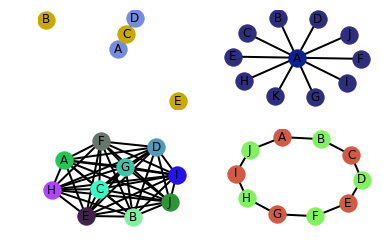

In [46]:
import networkx as nx
from math import *;
from random import *;
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

l=[]
l.append(nx.gnp_random_graph(5,0.3))
l.append(nx.star_graph(10))
l.append(nx.complete_graph(10))
l.append(nx.cycle_graph(10))
def clr_gr(G,ind):
    m=nx.convert_matrix.to_numpy_matrix(G).tolist()
    print(type(m))
    mx=0
    deg={}
    for i in range(len(list(m))):
        d=0
        for j in list(m[i]):
            if j>0:
                d+=1
        deg[i]=d
        if d>mx:
            mx=d
    mx

    def randomColor():
        letters="0123456789ABCDEF"
        color="#"
        for i in range(6):
            color+=letters[floor(random()*16)]
        return color


    n=mx+1


    list_color=[]
    while(n>0):
        f2=randomColor()
        if f2 not in list_color:
            list_color.append(f2)
            n = n - 1



    print(list_color)

    D={}
    for i in range(len(m)):
        D[i]=list(list_color)


    color={}
    for i in list(D.keys()):
        k=sel_node(D,deg)
        print(k)
        color[k]=D[k][0]
        del D[k]
        del deg[k]
        pl=list(D.keys())
        for hl in pl:
            if m[k][hl]>0.0:
                if color[k] in D[hl]:
                    D[hl].remove(color[k])
    print(color)

    print("Minimum Number of overlapping channels/Minimum No of colors:",len(set(color.values())))
    return color


    
def sel_node(D,ndeg):
    n_s={}
    l=[]
    for i in list(D.keys()):
        n_s[i]=len(D[i])
        l.append(len(D[i]))
    m_mrv=min(l)
    mx_deg=-999999
    s_node=0
    for i in list(D.keys()):
        if n_s[i]==m_mrv:
            if ndeg[i]>mx_deg:
                mx_deg=ndeg[i]
                s_node=i
    return s_node

def gr1_plt(G,ind):
    pos=nx.spring_layout(G)
    
    m=nx.convert_matrix.to_numpy_matrix(G).tolist()
    
    plt.subplot(220+ind)
    for i in range(len(m)):
        nx.draw_networkx_nodes(G,pos,nodelist=[i],with_label=True)

    E=[]
    for i in range(len(m)):
        for j in range(len(m[i])):
            if m[i][j]>0.0:
                if((j,i) not in E):             
                    E.append((i,j))
    nm={}
    for i in range(len(m)):
        nm[i]=chr(65+i)
    nx.draw_networkx_edges(G,pos,
                           edgelist=E,
                           width=2,alpha=1,edge_color='black')
    nx.draw_networkx_labels(G,pos,nm)
    plt.axis("off")

    
def gr_plt(G,color,ind):
    #get_ipython().run_line_magic('matplotlib', 'inline')
    pos=nx.spring_layout(G)
    
    m=nx.convert_matrix.to_numpy_matrix(G).tolist()
    
    plt.subplot(220+ind)
    for i in range(len(m)):
        nx.draw_networkx_nodes(G,pos,nodelist=[i],with_label=True,node_color=color[i])

    E=[]
    for i in range(len(m)):
        for j in range(len(m[i])):
            if m[i][j]>0.0:
                if((j,i) not in E):             
                    E.append((i,j))
    nm={}
    for i in range(len(m)):
        nm[i]=chr(65+i)
    nx.draw_networkx_edges(G,pos,
                           edgelist=E,
                           width=2,alpha=1,edge_color='black')
    nx.draw_networkx_labels(G,pos,nm)
    plt.axis("off")

nd_clr={}

"""for i in range(len(l)):
    gr1_plt(l[i],i+1)"""
for i in range(len(l)):
    nd_clr[i]=clr_gr(l[i],i+1)
    gr_plt(l[i],nd_clr[i],i+1)
